PCA step-by-step

In [96]:
import pandas as pd
import numpy as np

In [113]:
np.random.seed(23)

In [114]:
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0], [0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

In [115]:
class1_sample

array([[ 0.66698806,  0.02581308, -0.77761941],
       [ 0.94863382,  0.70167179, -1.05108156],
       [-0.36754812, -1.13745969, -1.32214752],
       [ 1.77225828, -0.34745899,  0.67014016],
       [ 0.32227152,  0.06034293, -1.04345   ],
       [-1.00994188,  0.44173637,  1.12887685],
       [-1.83806777, -0.93876863, -0.20184052],
       [ 1.04537128,  0.53816197,  0.81211867],
       [ 0.2411063 , -0.95250953, -0.13626676],
       [ 1.26724821,  0.17363364, -1.22325477],
       [ 1.41531998,  0.45771098,  0.72887584],
       [ 1.96843473, -0.54778801, -0.67941827],
       [-2.50623032,  0.14696049,  0.60619549],
       [-0.02253889,  0.01342226,  0.93594489],
       [ 0.42062266,  0.41161964, -0.07132392],
       [-0.04543758,  1.04088597, -0.09403473],
       [-0.42084395, -0.55198856, -0.12109755],
       [ 0.19014136,  0.51213739,  0.13153847],
       [-0.33161712, -1.63238628,  0.61911407],
       [-0.99257378, -0.16134639,  1.19240433]])

In [129]:
df = pd.DataFrame(class1_sample, columns = ['feature 1', 'feature 2', 'feature 3'])

In [130]:
df['target'] = 1

In [131]:
df

,feature 1,feature 2,feature 3,target
0,0.666988,0.025813,-0.777619,1
1,0.948634,0.701672,-1.051082,1
2,-0.367548,-1.137460,-1.322148,1
3,1.772258,-0.347459,0.670140,1
4,0.322272,0.060343,-1.043450,1
5,-1.009942,0.441736,1.128877,1
6,-1.838068,-0.938769,-0.201841,1
7,1.045371,0.538162,0.812119,1
8,0.241106,-0.952510,-0.136267,1
9,1.267248,0.173634,-1.223255,1


In [132]:
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)
df1 = pd.DataFrame(class2_sample, columns = ['feature 1', 'feature 2', 'feature 3'])

df1['target'] = 0

In [133]:
df1.head()

,feature 1,feature 2,feature 3,target
0,1.863740,1.349667,-0.248504,0
1,0.646807,1.123741,0.122360,0
2,2.194581,0.599653,1.886384,0
3,0.759620,1.651995,1.568860,0
4,-0.903515,0.756377,1.735966,0


In [134]:
df = pd.concat([df, df1], ignore_index=True)

In [ ]:
df = df.append(df1,ignore_index=True)

In [135]:
df

,feature 1,feature 2,feature 3,target
0,0.666988,0.025813,-0.777619,1
1,0.948634,0.701672,-1.051082,1
2,-0.367548,-1.137460,-1.322148,1
3,1.772258,-0.347459,0.670140,1
4,0.322272,0.060343,-1.043450,1
5,-1.009942,0.441736,1.128877,1
6,-1.838068,-0.938769,-0.201841,1
7,1.045371,0.538162,0.812119,1
8,0.241106,-0.952510,-0.136267,1
9,1.267248,0.173634,-1.223255,1


In [30]:
import plotly.express as px
fig = px.scatter_3d(df, x= 'feature1', y= 'feature2', z= 'feature3', color = df['target'].astype('str'), title = '3D Scatter plot of the dataset')
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:, 0:3] = scaler.fit_transform(df.iloc[:, 0:3])

In [158]:
fig1 = px.scatter_3d(df, x= 'feature 1', y= 'feature 2', z= 'feature 3', color = df['target'].astype('str'), title = '3D Scatter plot of the dataset')
fig1.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig1.show()

In [161]:
df

,feature 1,feature 2,feature 3,target
0,0.206059,-0.565853,-1.385813,1
1,0.478622,0.061226,-1.670048,1
2,-0.795116,-1.645166,-1.951792,1
3,1.275686,-0.912184,0.118982,1
4,-0.127541,-0.533815,-1.662116,1
5,-1.416794,-0.179949,0.595790,1
6,-2.218214,-1.460816,-0.787351,1
7,0.572240,-0.090483,0.266553,1
8,-0.206089,-1.473565,-0.719194,1
9,0.786962,-0.428701,-1.849004,1


In [165]:
covariance_matrix = np.cov([df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]])
print(covariance_matrix)

[[ 1.02564103  0.3571088  -0.09546422]
 [ 0.3571088   1.02564103  0.36060327]
 [-0.09546422  0.36060327  1.02564103]]


In [33]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [34]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [35]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [37]:
%matplotlib inline

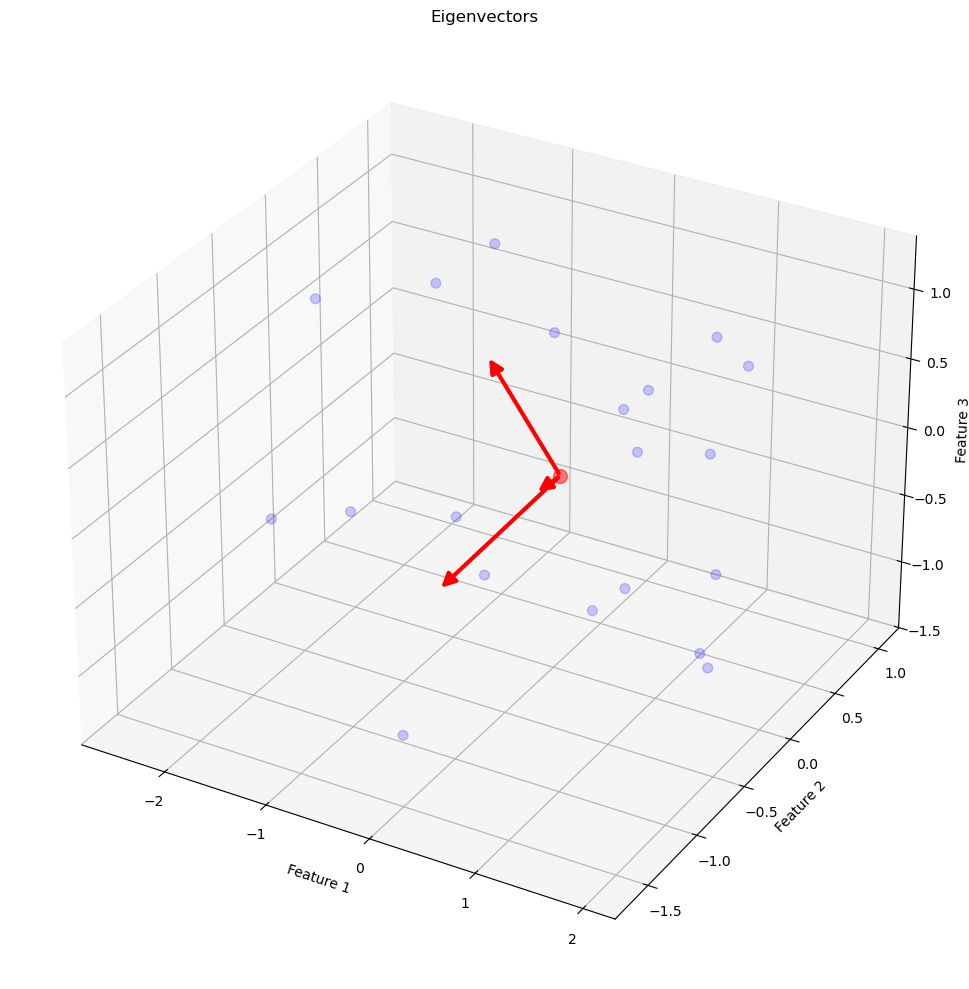

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs
        
    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return min(zs)

# Create the plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(df['feature1'], df['feature2'], df['feature3'], 
          c='blue', s=50, alpha=0.2)

# Plot mean point
mean_point = df[['feature1', 'feature2', 'feature3']].mean()
ax.scatter([mean_point['feature1']], 
          [mean_point['feature2']], 
          [mean_point['feature3']], 
          c='red', s=100, alpha=0.5)

# Plot eigenvectors
for v in eigen_vectors.T:
    a = Arrow3D([mean_point['feature1'], mean_point['feature1'] + v[0]], 
                [mean_point['feature2'], mean_point['feature2'] + v[1]], 
                [mean_point['feature3'], mean_point['feature3'] + v[2]], 
                mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('Eigenvectors')
plt.tight_layout()
plt.show()

In [45]:
pc = eigen_vectors[0:2]
pc
     

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [52]:
transformed_df = np.dot(df.iloc[:, 0:3], pc.T)

In [54]:
transformed_df

array([[-0.74905688,  0.14893013],
       [-1.50034546,  0.16335769],
       [ 0.35483591,  1.25088347],
       [-0.39339469, -1.66477169],
       [-0.71439133,  0.57532729],
       [ 0.77746677, -0.19393259],
       [ 1.54492986,  1.36816562],
       [-0.54818878, -1.30437862],
       [ 0.46563998, -0.04528325],
       [-1.38805908,  0.08982903],
       [-0.73149979, -1.48342868],
       [-1.00540131, -0.77296485],
       [ 1.53816046,  1.18529762],
       [ 0.45033984, -0.69163208],
       [-0.54622962, -0.22649469],
       [-0.74247404,  0.08976243],
       [ 0.55171013,  0.37332843],
       [-0.39478276, -0.22942573],
       [ 1.60695799, -0.23235992],
       [ 1.21680223, -0.24688808]])

In [136]:
# Create the final DataFrame with principal components
new_df = pd.DataFrame(transformed_df, columns=['PC1', 'PC2'])
new_df['target'] = df['target']  # Remove the parentheses
new_df.head()

,PC1,PC2,target
0,-0.749057,0.148930,1
1,-1.500345,0.163358,1
2,0.354836,1.250883,1
3,-0.393395,-1.664772,1
4,-0.714391,0.575327,1


In [152]:

new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()